In [2]:
#mount drive to save models
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

Epoch [1/70], Train Loss: 0.7036462426185608, Test Loss: 0.33331039547920227
Epoch [2/70], Train Loss: 0.3927804231643677, Test Loss: 0.41042661666870117
Epoch [3/70], Train Loss: 0.4176316261291504, Test Loss: 0.38590264320373535
Epoch [4/70], Train Loss: 0.40482959151268005, Test Loss: 0.3847602605819702
Epoch [5/70], Train Loss: 0.3989081084728241, Test Loss: 0.36567726731300354
Epoch [6/70], Train Loss: 0.38727670907974243, Test Loss: 0.34862852096557617
Epoch [7/70], Train Loss: 0.36924484372138977, Test Loss: 0.3170227110385895
Epoch [8/70], Train Loss: 0.3628747761249542, Test Loss: 0.3118852376937866
Epoch [9/70], Train Loss: 0.340060293674469, Test Loss: 0.31212887167930603
Epoch [10/70], Train Loss: 0.3226146101951599, Test Loss: 0.3082834780216217
Epoch [11/70], Train Loss: 0.3208892047405243, Test Loss: 0.2904161214828491
Epoch [12/70], Train Loss: 0.30171576142311096, Test Loss: 0.29041382670402527
Epoch [13/70], Train Loss: 0.3022024929523468, Test Loss: 0.282834470272064

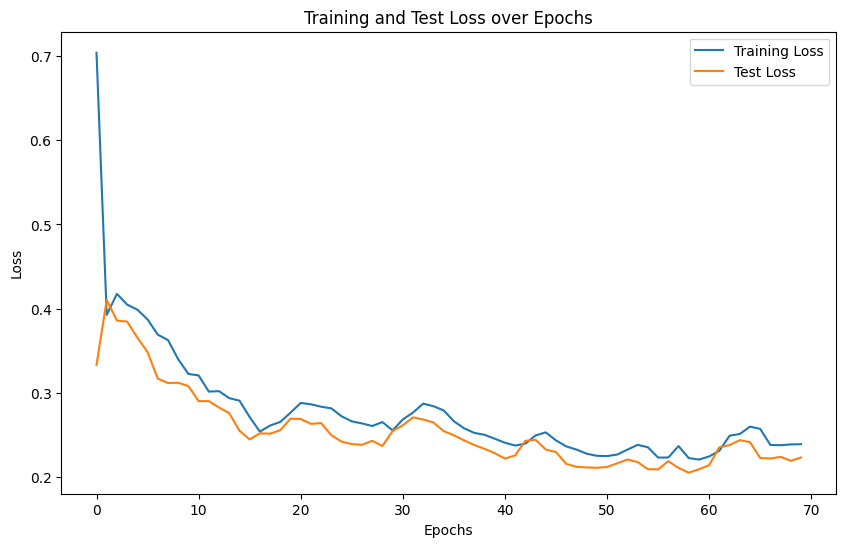

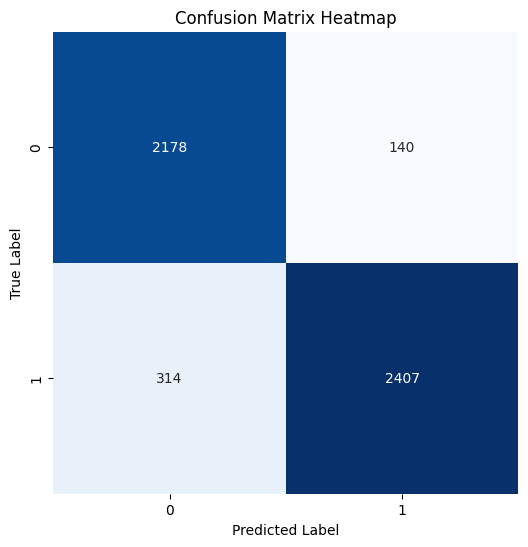

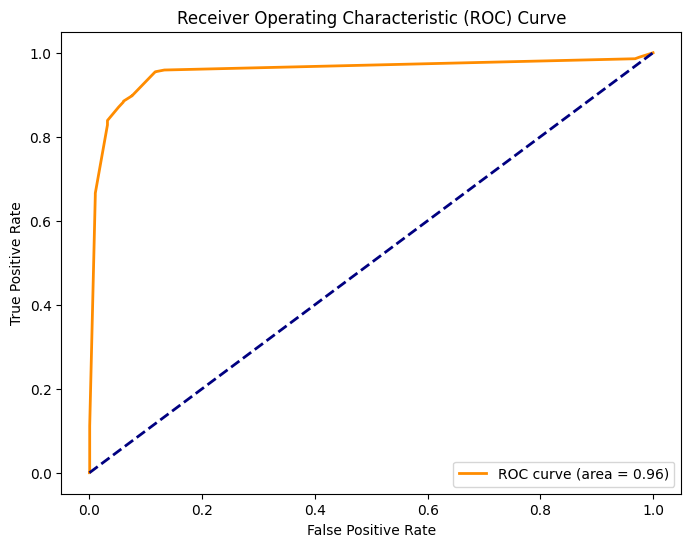


Performance Metrics:
Specificity: 0.94
FAR: 0.06
Precision: 0.95
Recall: 0.88
F1 Score: 0.91
Accuracy: 0.91


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Load data
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/processed_train.csv'
data = pd.read_csv(file_path1)

# Split into train and test sets
X = data.drop(labels='class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=4)

# Convert data to PyTorch tensors
train_data = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.long)
test_data = torch.tensor(X_test.values, dtype=torch.float32)
test_labels = torch.tensor(y_test.values, dtype=torch.long)

# Define SNN model
import torch
import torch.nn as nn

class ImprovedSNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, new_hidden_size):
        super(ImprovedSNN, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer1 = nn.Linear(hidden_size, 128)
        self.new_hidden_layer1 = nn.Linear(128, new_hidden_size)
        self.new_hidden_layer2 = nn.Linear(new_hidden_size, 64)
        self.new_hidden_layer3 = nn.Linear(64,32)
        self.hidden_layer3 = nn.Linear(32, 16)
        self.hidden_layer2 = nn.Linear(32, 16)
        self.dropout = nn.Dropout(0.15)  # Adjust dropout rate
        self.spike = nn.Hardtanh(0, 1)  # Spike activation function
        self.synaptic_weights = nn.Parameter(torch.rand(16, output_size))
        self.threshold = nn.Parameter(torch.rand(1))  # Adjust threshold

    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer1(x)
        x = self.new_hidden_layer1(x)
        x = self.new_hidden_layer2(x)
        x = self.new_hidden_layer3(x)
        x = self.dropout(x)
        x = self.hidden_layer2(x)
        x = self.spike(x - self.threshold)
        x = torch.mm(x, self.synaptic_weights)
        return x





# Training loop with test loss
def train_snn(model, train_data, labels, test_data, test_labels, num_epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    history = {'train_loss': [], 'test_loss': []}

    for epoch in range(num_epochs):
        # Training
        model.train()
        outputs = model(train_data)
        loss_train = criterion(outputs, labels)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()


        # Testing
        model.eval()
        with torch.no_grad():
            outputs_test = model(test_data)
            loss_test = criterion(outputs_test, test_labels)

        # Store training and test loss for visualization
        history['train_loss'].append(loss_train.item())
        history['test_loss'].append(loss_test.item())

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss_train.item()}, Test Loss: {loss_test.item()}')

    return history

# Initialize SNN model and train
input_size = X_train.shape[1]
hidden_size = 70
output_size = 2
num_epochs = 70
learning_rate = 0.01
new_hidden_size = 100

snn_model =ImprovedSNN(input_size, hidden_size, output_size, new_hidden_size)
import time
s = time.time()
history = train_snn(snn_model, train_data, labels, test_data, test_labels, num_epochs, learning_rate)
t = time.time() - s
print("training time:",t)
# Plot the training and test loss
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.title('Training and Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SNN on the test set
with torch.no_grad():
    test_outputs = snn_model(test_data)
    _, predicted = torch.max(test_outputs, 1)

# Calculate confusion matrix
conf_mat = confusion_matrix(test_labels, predicted)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate specificity and FAR from confusion matrix
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
TP = conf_mat[1, 1]

specificity = TN / (TN + FP)
far = FP / (FP + TN)

# Calculate additional performance metrics
precision = precision_score(test_labels, predicted)
recall = recall_score(test_labels, predicted)
f1 = f1_score(test_labels, predicted)
accuracy = accuracy_score(test_labels, predicted)

# ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, test_outputs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("Specificity: {:.2f}".format(specificity))
print("FAR: {:.2f}".format(far))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

In [ ]:
torch.save(snn_model.state_dict(), "/content/drive/My Drive/Final year project/models/snn.keras")

In [ ]:
#with data after pca and with hyperparameter tuning
# Load training and test data
train_data = pd.read_csv('/content/drive/MyDrive/Final year project/datafinal/train_set_after_pca.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Final year project/datafinal/test_set_after_pca.csv')

X_train = train_data.drop(labels='class', axis=1)
y_train = train_data['class']
X_test = test_data.drop(labels='class', axis=1)
y_test = test_data['class']

In [ ]:
input_size = X_train.shape[1]  # Number of input features
hidden_size = 64
new_hidden_size=32  # Increase the number of hidden units(changed hyperparameter)
output_size = 2  # Binary classification
num_epochs = 200  # Increase the number of epochs
learning_rate = 0.001  # Decrease the learning rate
train_data = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.long)
# Define and train the SNN model
snn_model_1 = ImprovedSNN(input_size, hidden_size, output_size,new_hidden_size)
train_snn(snn_model, train_data, labels, test_data, test_labels, num_epochs, learning_rate)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (20153x22 and 41x70)

In [ ]:
with torch.no_grad():
    test_data = torch.tensor(X_test.values, dtype=torch.float32)
    test_labels = torch.tensor(y_test.values, dtype=torch.long)

    test_outputs = snn_model_1(test_data)
    _, predicted = torch.max(test_outputs, 1)

# Calculate accuracy
correct = (predicted == test_labels).sum().item()
total = test_labels.size(0)
accuracy = correct / total * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 97.50%


In [ ]:
torch.save(snn_model_1.state_dict(), "/content/drive/My Drive/Final year project/models/snn2.keras")

In [ ]:
input_size = X_train.shape[1]  # Number of input features
hidden_size = 256 # Increase the number of hidden units(changed hyperparameter)
output_size = 2  # Binary classification
num_epochs = 100  # Increase the number of epochs
learning_rate = 0.005 # Decrease the learning rate
train_data = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.long)
# Define and train the SNN model
snn_model_2 = SNN(input_size, hidden_size, output_size)
train_snn(snn_model_2, train_data, labels, num_epochs, learning_rate)


Epoch [1/100], Loss: 0.8650089502334595
Epoch [2/100], Loss: 0.6517447829246521
Epoch [3/100], Loss: 0.5252499580383301
Epoch [4/100], Loss: 0.45077836513519287
Epoch [5/100], Loss: 0.39779889583587646
Epoch [6/100], Loss: 0.35502973198890686
Epoch [7/100], Loss: 0.31813517212867737
Epoch [8/100], Loss: 0.28489527106285095
Epoch [9/100], Loss: 0.2543640732765198
Epoch [10/100], Loss: 0.22633881866931915
Epoch [11/100], Loss: 0.20109237730503082
Epoch [12/100], Loss: 0.17890898883342743
Epoch [13/100], Loss: 0.16000646352767944
Epoch [14/100], Loss: 0.1443401277065277
Epoch [15/100], Loss: 0.13161075115203857
Epoch [16/100], Loss: 0.12141512334346771
Epoch [17/100], Loss: 0.11325245350599289
Epoch [18/100], Loss: 0.10684754699468613
Epoch [19/100], Loss: 0.10198647528886795
Epoch [20/100], Loss: 0.09840134531259537
Epoch [21/100], Loss: 0.0957825556397438
Epoch [22/100], Loss: 0.09385392814874649
Epoch [23/100], Loss: 0.09233472496271133
Epoch [24/100], Loss: 0.09103293716907501
Epoch [

In [ ]:
with torch.no_grad():
    test_data = torch.tensor(X_test.values, dtype=torch.float32)
    test_labels = torch.tensor(y_test.values, dtype=torch.long)

    test_outputs = snn_model_2(test_data)
    _, predicted = torch.max(test_outputs, 1)

# Calculate accuracy
correct = (predicted == test_labels).sum().item()
total = test_labels.size(0)
accuracy = correct / total * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 98.77%


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim

# Load data
file_path1 = '/content/drive/MyDrive/Final year project/datafinal/processed_train.csv'
data = pd.read_csv(file_path1)

# Split into train and test sets
X = data.drop(labels='class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=4)

# Convert data to PyTorch tensors
train_data = torch.tensor(X_train.values, dtype=torch.float32)
labels = torch.tensor(y_train.values, dtype=torch.long)
test_data = torch.tensor(X_test.values, dtype=torch.float32)
test_labels = torch.tensor(y_test.values, dtype=torch.long)

# Define SNN model
class SNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SNN, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.spike = nn.Hardtanh(0, 1)
        self.synaptic_weights = nn.Parameter(torch.rand(hidden_size, output_size))
        self.threshold = nn.Parameter(torch.rand(1))

    def forward(self, x):
        x = self.input_layer(x)
        x = self.spike(x - self.threshold)
        x = torch.mm(x, self.synaptic_weights)
        return x

# Training loop with test loss
def train_snn(model, train_data, labels, test_data, test_labels, num_epochs, learning_rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    history = {'train_loss': [], 'test_loss': []}

    for epoch in range(num_epochs):
        # Training
        model.train()
        outputs = model(train_data)
        loss_train = criterion(outputs, labels)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()


        # Testing
        model.eval()
        with torch.no_grad():
            outputs_test = model(test_data)
            loss_test = criterion(outputs_test, test_labels)

        # Store training and test loss for visualization
        history['train_loss'].append(loss_train.item())
        history['test_loss'].append(loss_test.item())

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss_train.item()}, Test Loss: {loss_test.item()}')

    return history

# Initialize SNN model and train
input_size = X_train.shape[1]
hidden_size = 64
output_size = 2
num_epochs = 50
learning_rate = 0.01

snn_model = SNN(input_size, hidden_size, output_size)
import time
s = time.time()
history = train_snn(snn_model, train_data, labels, test_data, test_labels, num_epochs, learning_rate)
t = time.time() - s
print("training time:",t)
# Plot the training and test loss
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['test_loss'], label='Test Loss')
plt.title('Training and Test Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SNN on the test set
with torch.no_grad():
    test_outputs = snn_model(test_data)
    _, predicted = torch.max(test_outputs, 1)

# Calculate confusion matrix
conf_mat = confusion_matrix(test_labels, predicted)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate specificity and FAR from confusion matrix
TN = conf_mat[0, 0]
FP = conf_mat[0, 1]
FN = conf_mat[1, 0]
TP = conf_mat[1, 1]

specificity = TN / (TN + FP)
far = FP / (FP + TN)

# Calculate additional performance metrics
precision = precision_score(test_labels, predicted)
recall = recall_score(test_labels, predicted)
f1 = f1_score(test_labels, predicted)
accuracy = accuracy_score(test_labels, predicted)

# ROC curve
fpr, tpr, thresholds = roc_curve(test_labels, test_outputs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print performance metrics
print("\nPerformance Metrics:")
print("Specificity: {:.2f}".format(specificity))
print("FAR: {:.2f}".format(far))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

NameError: name 'pd' is not defined